In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import the weight.csv generated from a periodic training. Here the weight.csv used is from the last period of Tmall dataset (SRIU/ckpts/tmall_MF_SRIU_10.19-10.30_0.5_0.01/MF_SRIU_10.30/weight.csv)

In [2]:
weight_df = pd.read_csv('weight.csv')
weight_df.head()

,userId,itemId,label,logits,neg_logits_mean,neg_logits_std,pos_logits_mean,pos_logits_std,score,score_expsum,count,weight
0,274596,191823,1,-2.083431,-2.009088,1.085618,-0.113879,2.40291,-0.409826,73.10641,66,0.599243
1,274596,403210,0,-2.700784,-2.009088,1.085618,-0.113879,2.40291,0.318573,73.10641,66,1.241489
2,274596,62635,0,-1.305239,-2.009088,1.085618,-0.113879,2.40291,-0.324170,73.10641,66,0.652835
3,274596,492356,0,-2.500918,-2.009088,1.085618,-0.113879,2.40291,0.226521,73.10641,66,1.132310
4,274596,277767,0,-3.217599,-2.009088,1.085618,-0.113879,2.40291,0.556601,73.10641,66,1.575132


Get users that have more than 700 samples for better distribution visualization

In [3]:
weight_df_user_count = weight_df.groupby('userId')['logits'].count().reset_index().rename(columns={'logits': 'count'})
weight_df_user_count[weight_df_user_count['count'] > 800].head()

,userId,count
119,670,1002
173,975,1170
1420,7739,888
1452,7976,1506
2990,16327,2130


Here we randomely choose user 7739 to visualize. We have tried several users, the results are similar.

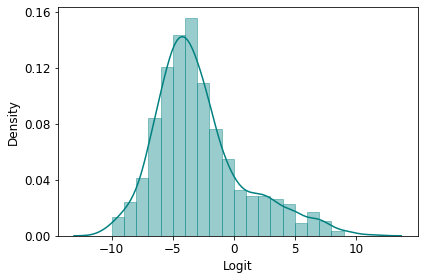

In [6]:
ax = sns.distplot(weight_df[weight_df.userId == 7739].logits, hist=True, kde=True, 
             bins=np.arange(-10, 10, 1), color='teal',
             hist_kws={'edgecolor':'teal'},
             kde_kws={'linewidth': 1.5})
plt.ylabel("Density", fontsize=12)
plt.xlabel("Logit", fontsize=12)
plt.yticks(np.arange(0, 0.17, 0.04), fontsize=12)
plt.xticks(np.arange(-10, 12.5, 5), fontsize=12)
plt.tight_layout()
# plt.savefig('logit_distplot.png')

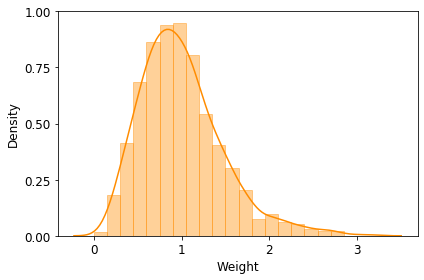

In [7]:
sns.distplot(weight_df[weight_df.userId == 7739].weight, hist=True, kde=True, 
             color='darkorange', bins=np.arange(0, 3, 0.15),
             hist_kws={'edgecolor':'darkorange'},
             kde_kws={'linewidth': 1.5})
plt.ylabel("Density", fontsize=12)
plt.xlabel("Weight", fontsize=12)
plt.yticks(np.arange(0, 1.2, 0.25), fontsize=12)
plt.xticks(np.arange(0, 3.1, 1), fontsize=12)
plt.tight_layout()
# plt.savefig('weight_distplot.png')